___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

   A industria cinematográfica é umas das maiores do mercado de entreterimento, movimentando bilhões de dólares anualmente, com alguns filmes recentes com orçamentos de até 400 milhões de dólares, o objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento.
   
   A base de dados contém informações de aproximadamente 5000 filmes, contendo vários dados sobre sua produção, genero, entre outros.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados que serão utilizados serão o revenue, budget e release_date. O revenue se refere a quanto  o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos e o release_date é a data de lançamento mundial no formato dia/mes/ano

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Desktop\Insper\2018\DPCD\DPCD\Projeto3


### BASE DE DADOS

In [3]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes

In [4]:
for i in range (len(nndf)): #Deixa a data de lançamento como mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### ANÁLISE DESCRITIVA

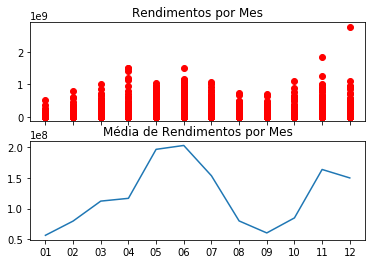

In [5]:
f, axarr = plt.subplots(2, sharex=True)

Y = nndf['revenue']
X = nndf[['release_date']]
axarr[0].plot(X,Y,'ro')
axarr[0].set_title('Rendimentos por Mes')

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
axarr[1].plot(X2,Y2)
axarr[1].set_title('Média de Rendimentos por Mes')

plt.show()

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses de Maio, Junho , Julho, Novembro tem um maior rendimento médio.

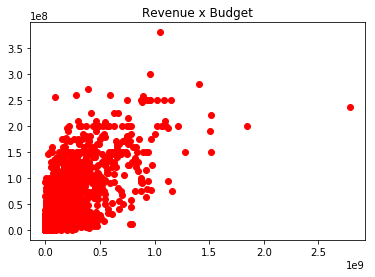

In [6]:
plt.plot(nndf['revenue'],nndf['budget'],'ro')
plt.title('Revenue x Budget')
plt.show()

Como é possível perber pelo gráfico, existe algum tipo de relação linear entre o Budget e o Revenue dos filmes

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [7]:
data.head()

,revenue,budget,release_date
0,2787965087,237000000,2009-12-10
1,961000000,300000000,2007-05-19
2,880674609,245000000,2015-10-26
3,1084939099,250000000,2012-07-16
4,284139100,260000000,2012-03-07


___
## CONCLUSÃO

In [8]:
import statsmodels.api as sm

Y = nndf['revenue']
X = nndf[['budget']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3196.
Date:                Tue, 22 May 2018   Prob (F-statistic):               0.00
Time:                        18:14:48   Log-Likelihood:                -64959.
No. Observations:                3229   AIC:                         1.299e+05
Df Residuals:                    3227   BIC:                         1.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.025e+05   3.15e+06      0.286      0.775   -5.28e+06    7.08e+06
budget         2.9601      0.052     56.533      0.000       2.857       3.063
==============================================================================
Omnibus:                     2528.122   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129017.819
Skew:                           3.276   Prob(JB):                         0.00
Kurtosis:                      33.266   Cond. No.                     8.16e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___
## REFERÊNCIAS BIBLIOGRÁFICAS